ref and acknowledge:
https://www.udemy.com/course/tensorflow-developer-certificate-machine-learning-zero-to-mastery


# Data preparation and preprocessing:

In [1]:
import os
import random
import zipfile
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import tensorflow as tf

2024-06-11 02:37:08.128327: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-11 02:37:08.128501: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-11 02:37:08.336372: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
file_path = '/kaggle/input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset_v2.json'
df = pd.read_json(file_path, lines=True)

df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [3]:
df = df.rename(columns={'is_sarcastic': 'label', 'headline': 'text'})

# Display the updated DataFrame
df.head()

,label,text,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [4]:
X = df['text']  # Input features (text)
y = df['label']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

# Create a dictionary to store randomly selected texts for each label
selected_texts = {}

# Iterate over each label (0 and 1) and randomly select one text
for label in df['label'].unique():
    texts = df[df['label'] == label]['text'].tolist()  # Get all texts for the current label
    selected_text = random.choice(texts)  # Randomly select one text
    selected_texts[label] = selected_text  # Store the selected text in the dictionary

# Print the randomly selected texts for each label
for label, text in selected_texts.items():
    print(f"Label {label}: {text}")

Training set shape: (20033,) (20033,)
Testing set shape: (8586,) (8586,)
Label 1: narcissist convinced total strangers would want his organs
Label 0: hillary clinton: college costs are 'outrageously high'


In [5]:
# Let's say we want to use 70% of the training data for training and 20% for validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

# Print the shapes of the new training and validation sets to verify the split
print("New training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)

New training set shape: (14023,) (14023,)
Validation set shape: (6010,) (6010,)


## Text vectorization

In [6]:
from tensorflow.keras.layers import TextVectorization

# Use the default TextVectorization variables
text_vectorizer = TextVectorization(max_tokens=None, # how many words in the vocabulary (all of the different words in your text)
                                    standardize="lower_and_strip_punctuation", # how to process text
                                    split="whitespace", # how to split tokens
                                    ngrams=None, # create groups of n-words?
                                    output_mode="int", # how to map tokens to numbers
                                    output_sequence_length=None) # how long should the output sequence of tokens be?
                                    # pad_to_max_tokens=True) # Not valid if using max_tokens=None

In [7]:
# Find average number of tokens (words) in training Tweets
round(sum([len(i.split()) for i in X_train])/len(X_train))

10

In [8]:
# Setup text vectorization with custom variables
max_vocab_length = 10000 # max number of words to have in our vocabulary
max_length = 10 # max length our sequences will be (e.g. how many words from a Tweet does our model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

To map our TextVectorization instance text_vectorizer to our data,

we can call the adapt() method on it whilst passing it our training text.

In [9]:
# Fit the text vectorizer to the training text
text_vectorizer.adapt(X_train)

In [10]:
# Vectorize the training and validation text
X_train_vect = text_vectorizer(X_train)
X_val_vect = text_vectorizer(X_val)

In [11]:
sample = "eat your veggies: 9 deliciously different recipes"
text_vectorizer(sample)

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([ 865,   34,    1,  700,    1,  597, 1125,    0,    0,    0])>

In [12]:
# Get the random sample's text and its index
random_sample = X_train.sample(1)
random_train_text = random_sample.values[0]
random_train_index = random_sample.index[0]

# Print the selected text
print("Text:", random_train_text)

# Use the index to get the corresponding label
random_train_label = y_train.loc[random_train_index]
print("Label:", random_train_label)

text_vectorizer(random_train_text)

Text: kentucky governor's crime plan: volunteer 'prayer patrols' roaming the streets
Label: 0


<tf.Tensor: shape=(10,), dtype=int64, numpy=array([2671, 4929, 1331,  204, 3680, 3305,    1,    1,    4, 1908])>

In [13]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5] # most common tokens (notice the [UNK] token for "unknown" words)
bottom_5_words = words_in_vocab[-5:] # least common tokens
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}")
print(f"Bottom 5 least common words: {bottom_5_words}")

Number of words in vocab: 10000
Top 5 most common words: ['', '[UNK]', 'to', 'of', 'the']
Bottom 5 least common words: ['arrogance', 'arriving', 'arrived', 'arresting', 'array']


## embedding

In [14]:
tf.random.set_seed(42)
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length, # set input shape
                             output_dim=128, # set size of embedding vector
                             embeddings_initializer="uniform", # default, intialize randomly
                             # input_length=max_length, # how long is each input
                             name="embedding_1")

embedding

<Embedding name=embedding_1, built=False>

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf
                    ("clf", MultinomialNB()) # model the text
])

# Fit the pipeline to the training data
model_0.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

# Recurrent Neural Networks (RNNs) Model
 RNN are designed to handle sequences of data, such as time series, speech, or text. To retain information from previous inputs while processing new ones:

The performance metrics plotted are:
- **Accuracy**: The proportion of true results (both true positives and true negatives) among the total number of cases examined.
- **Precision**: The proportion of true positive results in all positive predictions.
- **Recall**: The proportion of true positive results in all actual positive cases.
- **F1 Score**: The harmonic mean of precision and recall, providing a balance between them.

In [16]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [17]:
# Make predictions on the validation set
baseline_preds = model_0.predict(X_val)

# Calculate baseline results using your function
baseline_results = calculate_results(y_true=y_val, y_pred=baseline_preds)
print(baseline_results)

{'accuracy': 82.27953410981698, 'precision': 0.8288348156942275, 'recall': 0.8227953410981698, 'f1': 0.8213895454628543}


# 1. Vanilla RNN (Elman networks):
This is the most basic form of RNN. It processes sequences step by step, maintaining a memory (hidden state) of past information. The hidden state is updated at each step based on the current input and the previous hidden state. However, Vanilla RNNs often struggle with long sequences due to the vanishing gradient problem, where the influence of inputs diminishes over time.


In [18]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding

# Define the Vanilla RNN model
model_1 = Sequential([
    embedding,  # Use the embedding layer you have already created
    SimpleRNN(64),  # SimpleRNN layer with 64 units
    Dense(1, activation='sigmoid')  # Dense layer for binary classification
])

# Compile the model
model_1.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

# Train the model using the vectorized data
history_1 = model_1.fit(X_train_vect, y_train,
                        epochs=10,
                        validation_data=(X_val_vect, y_val))

Epoch 1/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.7378 - loss: 0.4960 - val_accuracy: 0.8423 - val_loss: 0.3530
Epoch 2/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9360 - loss: 0.1689 - val_accuracy: 0.8251 - val_loss: 0.5202
Epoch 3/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9860 - loss: 0.0458 - val_accuracy: 0.8300 - val_loss: 0.6488
Epoch 4/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9947 - loss: 0.0192 - val_accuracy: 0.8108 - val_loss: 0.7658
Epoch 5/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9977 - loss: 0.0096 - val_accuracy: 0.8218 - val_loss: 0.8006
Epoch 6/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9979 - loss: 0.0094 - val_accuracy: 0.8246 - val_loss: 0.8985
Epoch 7/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9980 - loss: 0.0066 - val_accuracy: 0.8193 - val_loss: 0.9590
Epoch 8/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9988 - loss: 0.0044 - val_accu

In [19]:
# Check the results

model_1.evaluate(X_val_vect, y_val)

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8312 - loss: 0.9533


[1.0103257894515991, 0.8241264820098877]

Embedding weights turn them into shorter codes that remember some of their meaning. This helps computers understand how words are related, like "king" and "queen"

In [20]:
embedding.weights

[<KerasVariable shape=(10000, 128), dtype=float32, path=sequential/embedding_1/embeddings>]

In [21]:
embed_weights = model_1.get_layer("embedding_1").get_weights()[0]
print(embed_weights.shape)

(10000, 128)


In [22]:
# Make predictions (these come back in the form of probabilities)
model_1_pred_probs = model_1.predict(X_val_vect)
model_1_pred_probs[:10] # only print out the first 10 prediction probabilities

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[9.9950802e-01],
       [9.9396062e-01],
       [3.5157074e-05],
       [3.8865587e-04],
       [9.9994946e-01],
       [9.9147969e-01],
       [9.9583662e-01],
       [4.1152038e-05],
       [5.3773642e-01],
       [9.9068463e-01]], dtype=float32)

In [23]:
# Turn prediction probabilities into single-dimension tensor of floats
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs)) # squeeze removes single dimensions
model_1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1.,
       1., 1., 1.], dtype=float32)>

# 2. Long Short-Term Memory (LSTM):
LSTMs are an advanced variant of RNNs specifically designed to overcome the vanishing gradient problem. They include special units called gates: input, output, and forget gates. These gates determine what information should be remembered or forgotten as the sequence progresses. This architecture allows LSTMs to capture long-term dependencies and retain information over longer sequences.

In [24]:
from tensorflow.keras.layers import LSTM

# Define the LSTM model
model_2 = Sequential([
    embedding,  # have already created
    LSTM(64),  # LSTM layer with 64 units
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

# Train the model using the vectorized data
history_2 = model_2.fit(X_train_vect, y_train,
                        epochs=10,
                        validation_data=(X_val_vect, y_val))

Epoch 1/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.8842 - loss: 0.2911 - val_accuracy: 0.8323 - val_loss: 0.4655
Epoch 2/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9596 - loss: 0.1094 - val_accuracy: 0.8251 - val_loss: 0.6103
Epoch 3/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9856 - loss: 0.0461 - val_accuracy: 0.8120 - val_loss: 0.7665
Epoch 4/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9921 - loss: 0.0285 - val_accuracy: 0.8095 - val_loss: 0.9251
Epoch 5/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9934 - loss: 0.0255 - val_accuracy: 0.8082 - val_loss: 0.8342
Epoch 6/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9950 - loss: 0.0159 - val_accuracy: 0.8238 - val_loss: 0.9210
Epoch 7/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9964 - loss: 0.0111 - val_accuracy: 0.8203 - val_loss: 0.9096
Epoch 8/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9986 - loss: 0.0071 - val_accu

In [25]:
# Evaluate the model on the validation set
model_2.evaluate(X_val_vect, y_val)

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8256 - loss: 1.1747


[1.2147711515426636, 0.8166389465332031]

In [26]:
embed_weights2 = model_2.get_layer("embedding_1").get_weights()[0]
print(embed_weights2.shape)

(10000, 128)


In [27]:
# Make predictions (these come back in the form of probabilities)
model_2_pred_probs = model_2.predict(X_val_vect)
model_2_pred_probs[:10] # only print out the first 10 prediction probabilities

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([[9.9999762e-01],
       [9.9999243e-01],
       [9.1637548e-06],
       [4.9006594e-05],
       [9.9339789e-01],
       [9.9999422e-01],
       [9.9999768e-01],
       [1.0305713e-02],
       [1.0964671e-01],
       [9.9999630e-01]], dtype=float32)

In [28]:
# Turn prediction probabilities into single-dimension tensor of floats
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs)) # squeeze removes single dimensions
model_2_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1.,
       1., 1., 1.], dtype=float32)>

# 3.Gated Recurrent Unit (GRU):
GRUs are similar to LSTMs but are simpler and use fewer gates (two gates: update and reset). This makes them computationally less expensive and faster to train than LSTMs. Despite the simplicity, GRUs can perform on par with LSTMs on many tasks and are especially effective when dealing with smaller datasets or when computational efficiency is a concern.

In [29]:
from tensorflow.keras.layers import GRU

# Define the GRU model
model_3 = Sequential([
    embedding,  # Reuse the embedding layer you have already created
    GRU(64),  # GRU layer with 64 units
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

# Train the model using the vectorized data
history_3 = model_3.fit(X_train_vect, y_train,
                        epochs=10,
                        validation_data=(X_val_vect, y_val))

Epoch 1/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9054 - loss: 0.2165 - val_accuracy: 0.8196 - val_loss: 0.7270
Epoch 2/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9933 - loss: 0.0208 - val_accuracy: 0.8135 - val_loss: 0.8718
Epoch 3/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9969 - loss: 0.0107 - val_accuracy: 0.8138 - val_loss: 1.0104
Epoch 4/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9975 - loss: 0.0070 - val_accuracy: 0.8143 - val_loss: 0.9958
Epoch 5/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9993 - loss: 0.0037 - val_accuracy: 0.8138 - val_loss: 1.0828
Epoch 6/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9990 - loss: 0.0048 - val_accuracy: 0.8160 - val_loss: 1.0861
Epoch 7/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9993 - loss: 0.0035 - val_accuracy: 0.8105 - val_loss: 1.1287
Epoch 8/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9998 - loss: 0.0016 - val_accu

In [30]:
# Evaluate the model on the validation set
model_3.evaluate(X_val_vect, y_val)

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8196 - loss: 1.0733


[1.1276406049728394, 0.8133111596107483]

In [31]:
embed_weights3 = model_3.get_layer("embedding_1").get_weights()[0]
print(embed_weights3.shape)

(10000, 128)


In [32]:
# Make predictions (these come back in the form of probabilities)
model_3_pred_probs = model_3.predict(X_val_vect)
model_3_pred_probs[:10] # only print out the first 10 prediction probabilities

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([[9.9999630e-01],
       [9.9999750e-01],
       [5.0131666e-06],
       [2.0907938e-03],
       [9.9997592e-01],
       [9.9999774e-01],
       [9.9991941e-01],
       [8.4488893e-06],
       [1.5631515e-03],
       [9.9996477e-01]], dtype=float32)

In [33]:
# Turn prediction probabilities into single-dimension tensor of floats
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs)) # squeeze removes single dimensions
model_3_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1.,
       1., 1., 1.], dtype=float32)>

# 4.Bidirectional RNN:
These networks process information in both forward and backward directions of a sequence. They have two layers running in opposite directions, allowing them to capture context from both past and future data points. Bidirectional RNNs are particularly useful in tasks where the entire sequence is known from the start, such as in speech and text processing, enabling more accurate predictions and analyses.

In [34]:
from tensorflow.keras.layers import Bidirectional, LSTM

# Define the Bidirectional RNN model
model_4 = Sequential([
    embedding,  # have already created
    Bidirectional(LSTM(64)),  # Bidirectional LSTM layer with 64 units
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

# Train the model using the vectorized data
history_4 = model_4.fit(X_train_vect, y_train,
                        epochs=10,
                        validation_data=(X_val_vect, y_val))


Epoch 1/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.9555 - loss: 0.1444 - val_accuracy: 0.8223 - val_loss: 0.8602
Epoch 2/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9981 - loss: 0.0074 - val_accuracy: 0.8100 - val_loss: 0.9778
Epoch 3/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9984 - loss: 0.0045 - val_accuracy: 0.8136 - val_loss: 1.1489
Epoch 4/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9990 - loss: 0.0024 - val_accuracy: 0.8136 - val_loss: 1.3409
Epoch 5/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9996 - loss: 0.0035 - val_accuracy: 0.8048 - val_loss: 1.3587
Epoch 6/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9997 - loss: 0.0025 - val_accuracy: 0.8060 - val_loss: 1.4818
Epoch 7/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9996 - loss: 0.0023 - val_accuracy: 0.8063 - val_loss: 1.1898
Epoch 8/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9982 - loss: 0.0070 - val_a

In [35]:
# Evaluate the model on the validation set
model_4.evaluate(X_val_vect, y_val)

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8257 - loss: 1.4168


[1.4804271459579468, 0.8189684152603149]

In [36]:
embed_weights4 = model_4.get_layer("embedding_1").get_weights()[0]
print(embed_weights4.shape)

(10000, 128)


In [37]:
# Make predictions (these come back in the form of probabilities)
model_4_pred_probs = model_4.predict(X_val_vect)
model_4_pred_probs[:10] # only print out the first 10 prediction probabilities

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


array([[9.9999988e-01],
       [1.0000000e+00],
       [2.8986390e-06],
       [1.7005472e-05],
       [9.9999964e-01],
       [1.0000000e+00],
       [9.9996853e-01],
       [1.7054548e-07],
       [1.4611189e-03],
       [9.9999988e-01]], dtype=float32)

In [38]:
# Turn prediction probabilities into single-dimension tensor of floats
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs)) # squeeze removes single dimensions
model_4_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1.,
       1., 1., 1.], dtype=float32)>

# compare the models

In [39]:
# Prepare the predictions for each model
model_preds = {
    "Vanilla RNN (Elman networks)": model_1_preds,
    "LSTM": model_2_preds,
    "GRU": model_3_preds,
    "Bidirectional RNN": model_4_preds
}

# Calculate results for each model and store them
model_results = {}
for model_name, preds in model_preds.items():
    model_results[model_name] = calculate_results(y_true=y_val, y_pred=preds)

# Print the formatted metrics for each model
for model_name, results in model_results.items():
    print(f"{model_name}:")
    print(f"Accuracy: {results['accuracy']:.2f}%")
    print(f"Precision: {results['precision']:.3f}")
    print(f"Recall: {results['recall']:.3f}")
    print(f"F1 Score: {results['f1']:.3f}")
    print("----------------------------")

Vanilla RNN (Elman networks):
Accuracy: 82.41%
Precision: 0.825
Recall: 0.824
F1 Score: 0.824
----------------------------
LSTM:
Accuracy: 81.66%
Precision: 0.819
Recall: 0.817
F1 Score: 0.817
----------------------------
GRU:
Accuracy: 81.33%
Precision: 0.816
Recall: 0.813
F1 Score: 0.813
----------------------------
Bidirectional RNN:
Accuracy: 81.90%
Precision: 0.820
Recall: 0.819
F1 Score: 0.819
----------------------------


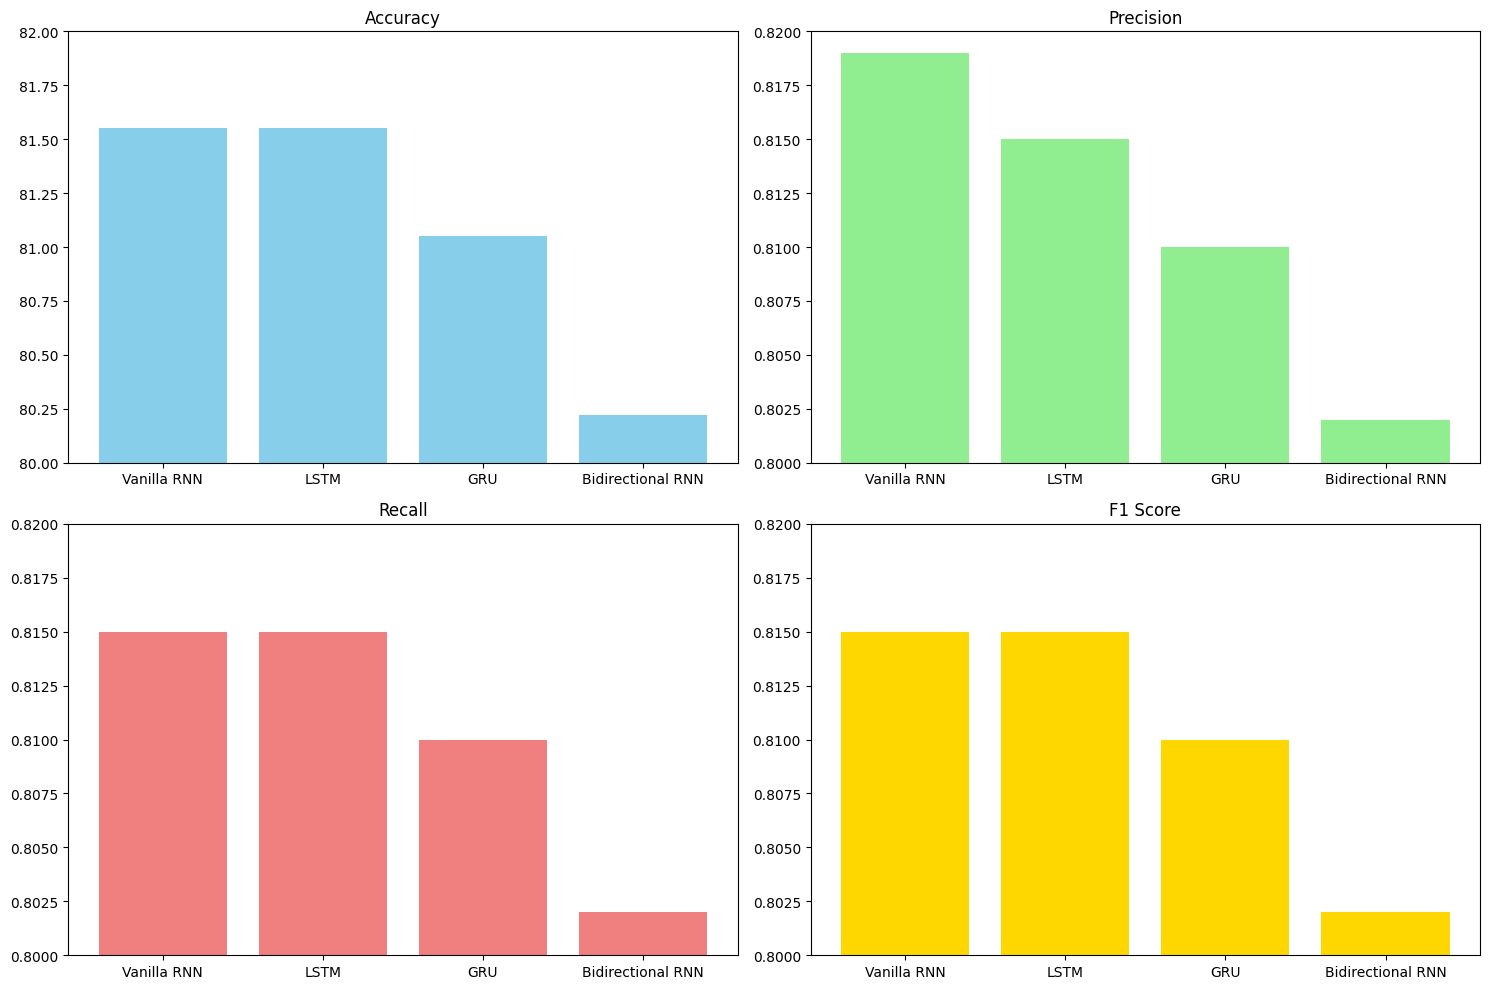

In [40]:
models = ["Vanilla RNN", "LSTM", "GRU", "Bidirectional RNN"]
accuracies = [81.55, 81.55, 81.05, 80.22]
precisions = [0.819, 0.815, 0.810, 0.802]
recalls = [0.815, 0.815, 0.810, 0.802]
f1_scores = [0.815, 0.815, 0.810, 0.802]

# Create a 2x2 grid for the plots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot Accuracy
axs[0, 0].bar(models, accuracies, color='skyblue')
axs[0, 0].set_title('Accuracy')
axs[0, 0].set_ylim([80, 82])

# Plot Precision
axs[0, 1].bar(models, precisions, color='lightgreen')
axs[0, 1].set_title('Precision')
axs[0, 1].set_ylim([0.8, 0.82])

# Plot Recall
axs[1, 0].bar(models, recalls, color='lightcoral')
axs[1, 0].set_title('Recall')
axs[1, 0].set_ylim([0.8, 0.82])

# Plot F1 Score
axs[1, 1].bar(models, f1_scores, color='gold')
axs[1, 1].set_title('F1 Score')
axs[1, 1].set_ylim([0.8, 0.82])

plt.tight_layout()
plt.show()